# <font color = #4854E8> Popular Classification Algorithms: </font>

- Logistic Regression
- K-Nearest Neighbors
- Decision Tree
- Support Vector Machines
- Naive Bayes
- etc

# <font color = #4854E8> Support Vector Machines with Scikit-learn </font>

In this tutorial, you'll learn about Support Vector Machines, one of the most popular and widely used supervised machine learning algorithms.

![](https://raw.githubusercontent.com/rauzansumara/introduction-to-machine-learning/master/Images/svm1.png)

## How does SVM work?

SVM searches for the maximum marginal hyperplane
- Generate hyperplanes which segregates the classes in the best way.
- Select the right hyperplane with the maximum segregation from the either nearest data points

![](https://raw.githubusercontent.com/rauzansumara/introduction-to-machine-learning/master/Images/svm3.png)

![](https://raw.githubusercontent.com/rauzansumara/introduction-to-machine-learning/master/Images/svm4.png)

## Dealing with non-linear

Some problems can’t be solved using linear hyperplane

![](https://miro.medium.com/max/875/1*gXvhD4IomaC9Jb37tzDUVg.png)



#### SVM Kernels

- Linear Kernel -> K(x, xi) = sum(x * xi)
- Polynomial Kernel -> K(x,xi) = 1 + sum(x * xi)^d
- Radial Basis Function (RBF) Kernel -> K(x,xi) = exp(-gamma * sum((x – xi^2))

## SVM Implementation

We begin with the standard imports:


In [84]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

# use seaborn plotting defaults
import seaborn as sns 
#sns.set()

plt.style.use('default')

As an example of this, consider the simple case of a classification task, in which the two classes of points are well separated:

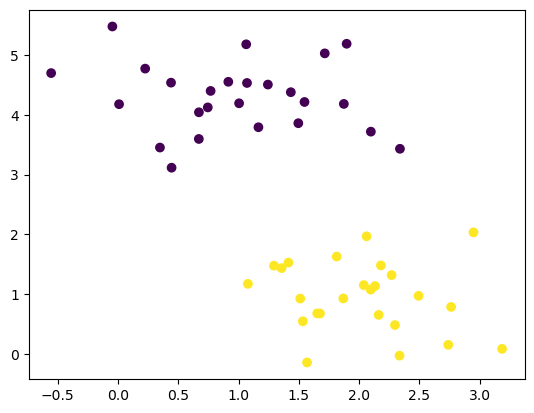

In [89]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2, n_features= 2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y)

A linear discriminative classifier would attempt to draw a straight line separating the two sets of data, and thereby create a model for classification. For two dimensional data like that shown here, this is a task we could do by hand. But immediately we see a problem: there is more than one possible dividing line that can perfectly discriminate between the two classes!

We can draw them as follows:

(-1.0, 3.5)

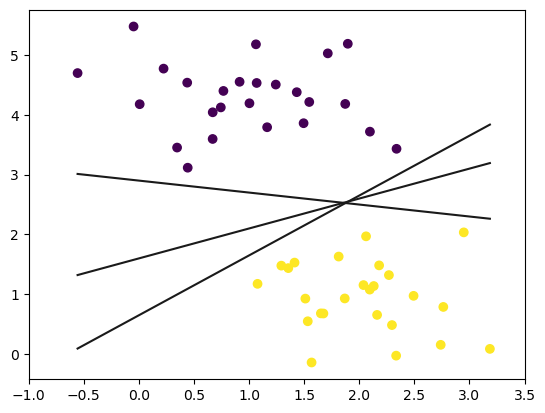

In [106]:
xfit = np.linspace(X[:,0].min(), X[:,0].max())
plt.scatter(X[:, 0], X[:, 1], c=y)
#plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for w, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, w * xfit + b, '-k')

plt.xlim(-1, 3.5)

These are three very different separators which, nevertheless, perfectly discriminate between these samples. Depending on which you choose, a new data point (e.g., the one marked by the "X" in this plot) will be assigned a different label! Evidently our simple intuition of "drawing a line between classes" is not enough, and we need to think a bit deeper.

## Support Vector Machines: Maximizing the Margin

Support vector machines offer one way to improve on this. The intuition is this: rather than simply drawing a zero-width line between the classes, we can draw around each line a margin of some width, up to the nearest point. Here is an example of how this might look:

(-1.0, 3.5)

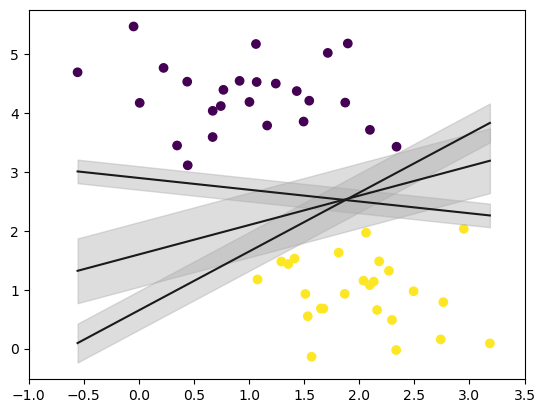

In [100]:
xfit = np.linspace(X[:,0].min(), X[:,0].max())
plt.scatter(X[:, 0], X[:, 1], c=y)

for w, b, m in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = w * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - m, yfit + m, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

In support vector machines, the line that maximizes this margin is the one we will choose as the optimal model. Support vector machines are an example of such a maximum margin estimator.

## Fitting a support vector machine

Let's see the result of an actual fit to this data: we will use Scikit-Learn's support vector classifier to train an SVM model on this data. For the time being, we will use a linear kernel and set the C parameter to a very large number (we'll discuss the meaning of these in more depth momentarily).

In [14]:
# Support vector classifier
from sklearn.svm import SVC 

model = SVC(kernel='linear')
model.fit(X, y)

SVC(kernel='linear')

To better visualize what's happening here, let's create a quick convenience function that will plot SVM decision boundaries for us:

In [102]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

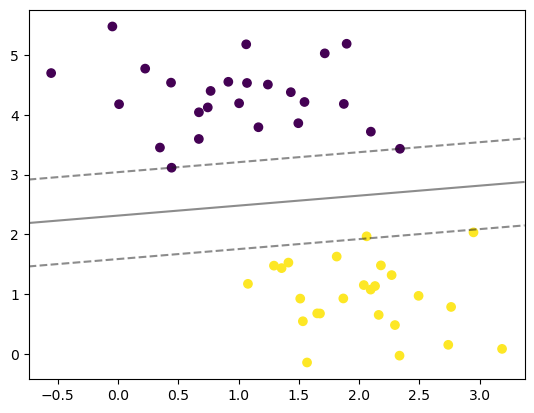

In [104]:
# plot decision boundary and margins accroding to SVC function
plt.scatter(X[:, 0], X[:, 1], c=y)
plot_svc_decision_function(model)

This is the dividing line that maximizes the margin between the two sets of points. Notice that a few of the training points just touch the margin: they are indicated by the black circles in this figure. These points are the pivotal elements of this fit, and are known as the support vectors, and give the algorithm its name. In Scikit-Learn, the identity of these points are stored in the support_vectors_ attribute of the classifier:

In [61]:
# support vector
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

## Beyond linear boundaries: Kernel SVM

Where SVM becomes extremely powerful is when it is combined with kernels. There we projected our data into higher-dimensional space defined by polynomials and Gaussian basis functions, and thereby were able to fit for nonlinear relationships with a linear classifier.

In SVM models, we can use a version of the same idea. To motivate the need for kernels, let's look at some data that is not linearly separable:

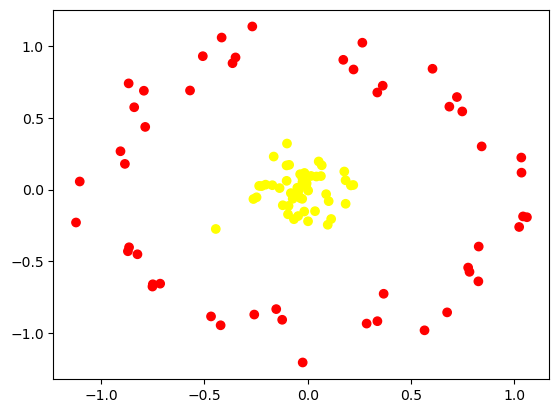

In [113]:
# create artificial data
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=100, factor=0.1, noise=0.1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn')

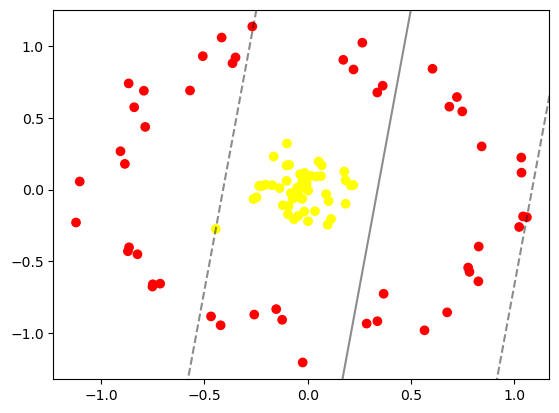

In [117]:
# svm with linear kernel
clf = SVC(kernel='linear').fit(X, y)

# plot result
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False)

It is clear that no linear discrimination will ever be able to separate this data. But we can draw a lesson from the basis function regressions in In Depth: Linear Regression, and think about how we might project the data into a higher dimension such that a linear separator would be sufficient. For example, one simple projection we could use would be to compute a radial basis function centered on the middle clump:

- Radial Basis Function (RBF) Kernel -> K(x,xi) = exp(-gamma * sum((x – xi^2))

In [120]:
# transform rbf kernel
r = np.exp(-(X ** 2).sum(1))

We can visualize this extra data dimension using a three-dimensional plot—if you are running this notebook live, you will be able to use the sliders to rotate the plot:

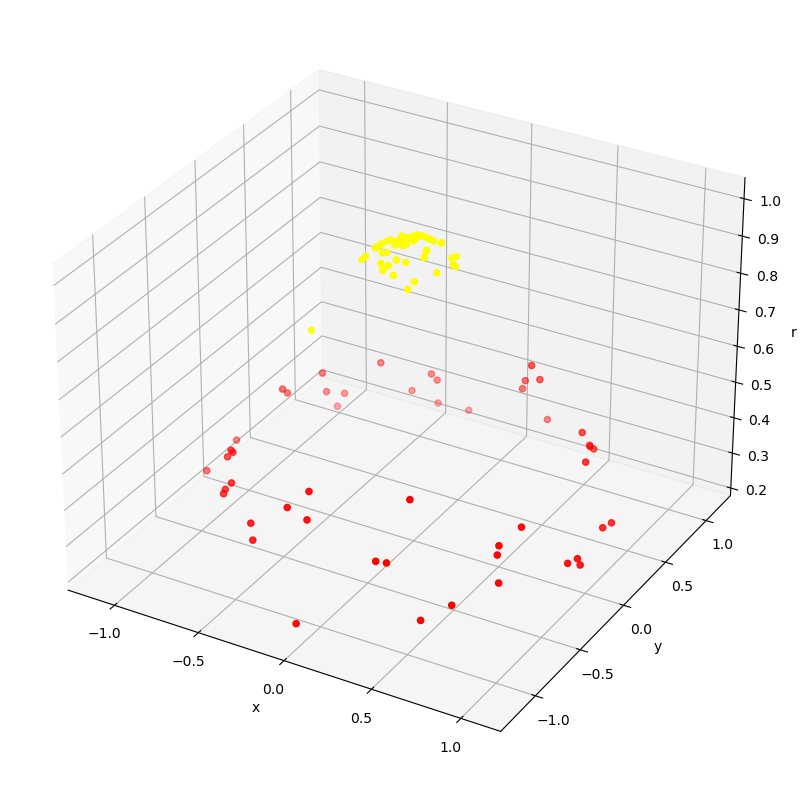

In [121]:
# after using kernel
fig = plt.figure(figsize=(15,10))
ax = plt.subplot(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], r, c=y, cmap='autumn')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('r')
plt.show()

In Scikit-Learn, we can apply kernelized SVM simply by changing our linear kernel to an RBF (radial basis function) kernel, using the kernel model hyperparameter:

In [122]:
# svm with rbf kernel
clf = SVC(kernel='rbf')
clf.fit(X, y)

SVC()

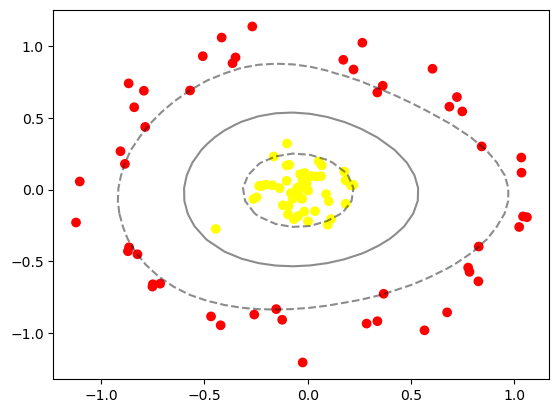

In [124]:
# plot results
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

In [125]:
clf.support_vectors_

array([[ 0.36702342, -0.72588866],
       [-0.88517521,  0.17947204],
       [-0.8244458 , -0.4505876 ],
       [ 0.8270361 , -0.39670614],
       [ 0.33627002,  0.67713848],
       [-0.15286587, -0.832789  ],
       [-0.57000198,  0.69112439],
       [ 0.84132716,  0.30137093],
       [ 0.22001934,  0.03228603],
       [-0.16508434,  0.23060704],
       [ 0.09637009, -0.24473984],
       [-0.44532477, -0.27415244],
       [-0.10074566,  0.32137734]])

Using this kernelized support vector machine, we learn a suitable nonlinear decision boundary. This kernel transformation strategy is used often in machine learning to turn fast linear methods into fast nonlinear methods, especially for models in which the kernel trick can be used.

## Tuning the SVM: Softening Margins

The soft margin SVM follows a somewhat similar optimization procedure with a couple of differences. First, in this scenario, we allow misclassifications to happen. So we’ll need to minimize the misclassification error, which means that we’ll have to deal with one more constraint. Second, to minimize the error, we should define a loss function. A common loss function used for soft margin is the hinge loss.

![](https://raw.githubusercontent.com/rauzansumara/introduction-to-machine-learning/master/Images/svm6.png)

Our discussion thus far has centered around very clean datasets, in which a perfect decision boundary exists. But what if your data has some amount of overlap? For example, you may have data like this:

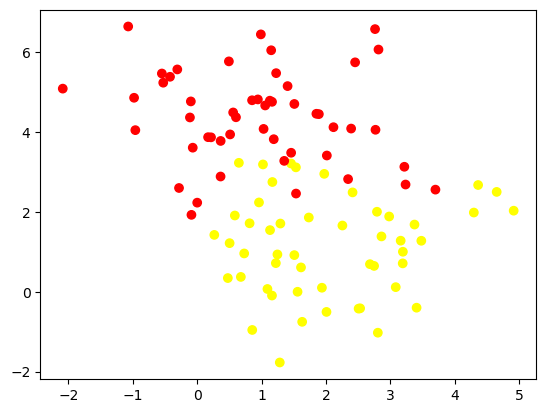

In [126]:
# create artificial data
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
# plot data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn')

To handle this case, the SVM implementation has a bit of a fudge-factor which "softens" the margin: that is, it allows some of the points to creep into the margin if that allows a better fit. The hardness of the margin is controlled by a tuning parameter, most often known as C. For very large C, the margin is hard, and points cannot lie in it. For smaller C, the margin is softer, and can grow to encompass some points.

The plot shown below gives a visual picture of how a changing C parameter affects the final fit, via the softening of the margin:

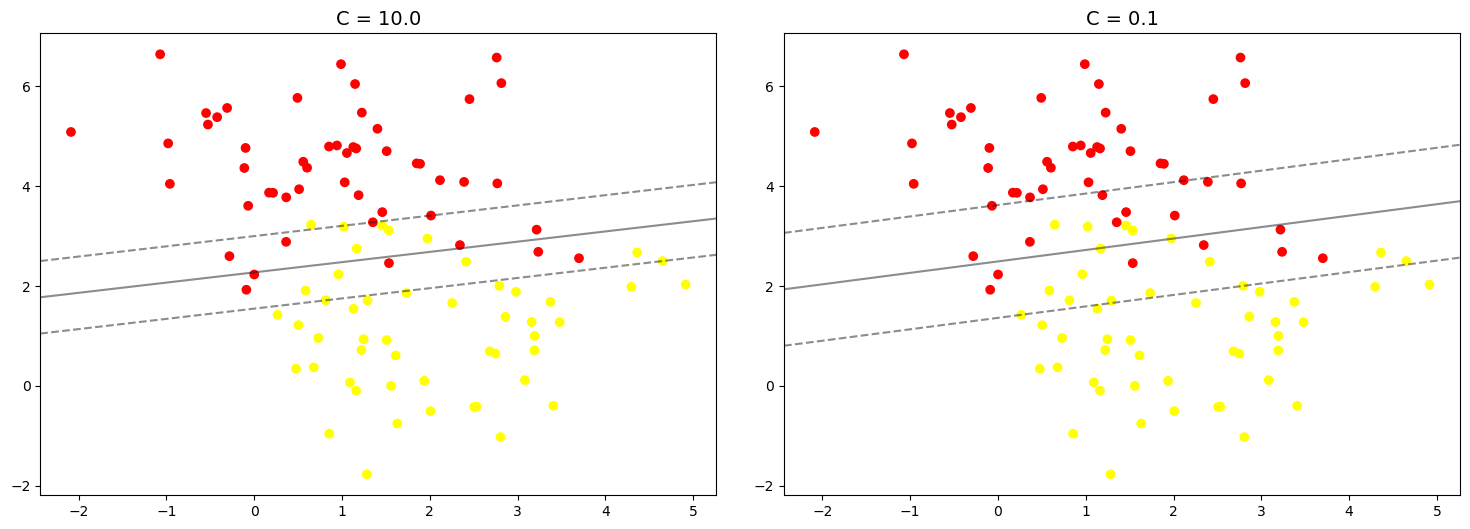

In [128]:
# X, y = make_blobs(n_samples=100, centers=2,
#                   random_state=0, cluster_std=0.8)

# set the subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# looping for trying different C values
for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

The optimal value of the C parameter will depend on your dataset, and should be tuned using cross-validation or a similar procedure